In [2]:
import sys
sys.path.append("../../")
DATA_PATH = "../../data/"
SAVE_PATH = "../../plots"

import abm_py as abm
import matplotlib.pyplot as plt
import numpy as np
import py_common.utility as utility
from py_common.units import *
import scipy

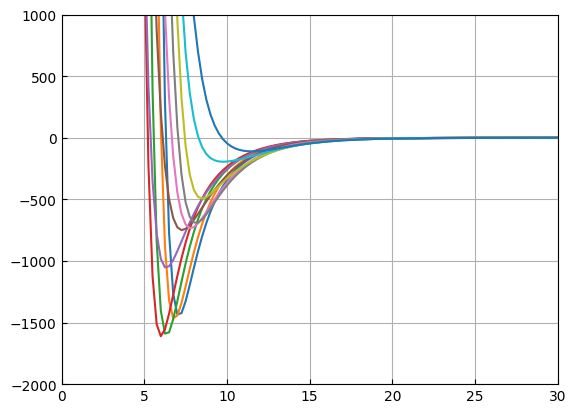

In [ ]:
from scipy.special import lpmv

data = utility.load(f"{DATA_PATH}/potential_srf_rb_data.dat")
distances = data[:, 0]
values = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values)

ax.set_xlim(0, 30)
ax.set_ylim(-2000, 1000);

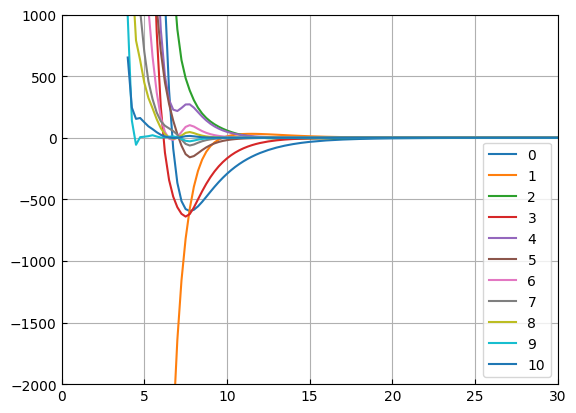

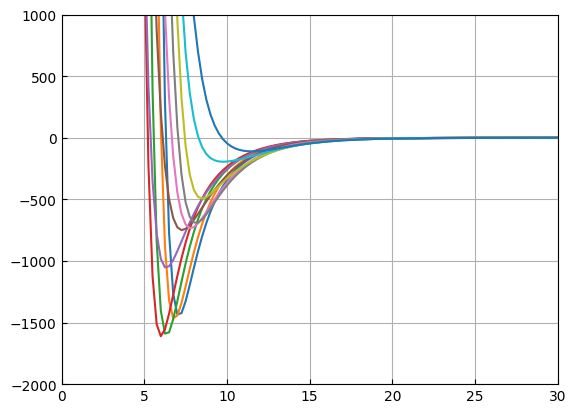

In [32]:
data = utility.load(f"{DATA_PATH}/potential_dec_SrF_Rb.dat")
distances = data[:, 0]
values_legendre = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values_legendre)
ax.legend([str(i) for i in range(11)])

ax.set_xlim(0, 30)
ax.set_ylim(-2000, 1000)

xs, weights = np.polynomial.legendre.leggauss(11)
xs = xs[::-1]

values_reconstructed = np.zeros_like(values)
for angle_index, x in enumerate(xs):
    legendre = np.array([lpmv(0, lambd, x) for lambd in range(11)])
    
    for i in range(len(distances)):
        value = np.sum(values_legendre[i, :] * legendre)
        values_reconstructed[i, angle_index] = value

        
fig, ax = utility.plot()
ax.plot(distances, values_reconstructed)
ax.set_xlim(0, 30)
ax.set_ylim(-2000, 1000);

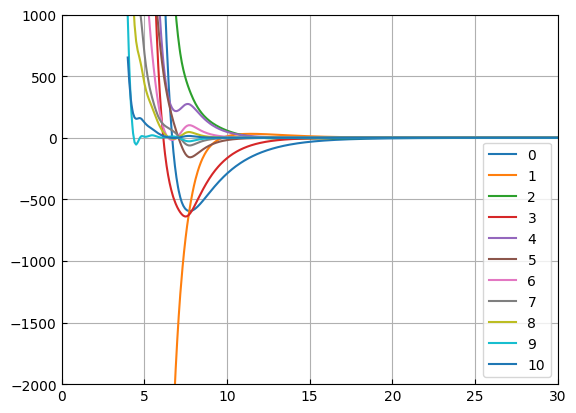

In [12]:
data = utility.load(f"{DATA_PATH}/interpolated_dec_SrF_Rb.dat")
distances = data[:, 0]
values = data[:, 1:]

fig, ax = utility.plot()
ax.plot(distances, values)

ax.legend([str(i) for i in range(11)])
ax.set_xlim(0, 30)
ax.set_ylim(-2000, 1000);

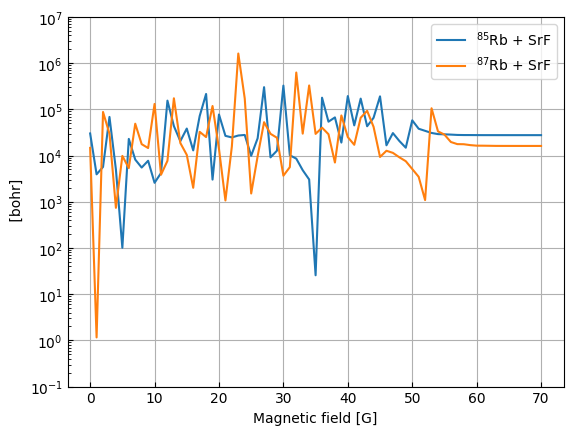

In [14]:
fig, ax = utility.plot()
ax.set_xlabel("Magnetic field [G]")
ax.set_ylabel(" [bohr]")
ax.set_yscale("log")
ax.set_ylim(0.1, 1e7)

data = utility.load(f"{DATA_PATH}/srf_rb_elastic_section_false.dat")
ax.plot(data[:, 0], data[:, 1], label="$^{85}$Rb + SrF")

data = utility.load(f"{DATA_PATH}/srf_rb_elastic_section_true.dat")
ax.plot(data[:, 0], data[:, 1], label="$^{87}$Rb + SrF")

ax.legend();